In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,NaN,NaN,3.24,NaN,NaN,5.68,NaN,NaN,1185.0
3,14.37,1.95,2.50,16.8,NaN,NaN,3.49,NaN,NaN,7.80,NaN,NaN,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	14
float64		column 3	0
float64		column 4	0
float64		column 5	14
float64		column 6	15
float64		column 7	21
float64		column 8	14
float64		column 9	29
float64		column 10	15
float64		column 11	29
float64		column 12	36
float64		column 13	22


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,164.000000,178.000000,178.000000,164.000000,163.000000,157.000000,164.000000,149.000000,163.000000,149.000000,142.000000,156.000000
mean,12.983041,2.295671,2.366517,19.494944,99.884146,2.256196,2.023567,0.363780,1.534631,5.057791,0.970443,2.584014,750.211538
std,0.818447,1.069155,0.274344,3.339564,14.563337,0.615538,0.995538,0.122456,0.535581,2.216097,0.226441,0.712063,317.323891
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.335000,1.607500,2.210000,17.200000,88.000000,1.700000,1.200000,0.270000,1.150000,3.250000,0.800000,1.947500,498.750000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.230000,2.140000,0.340000,1.460000,4.700000,0.980000,2.745000,679.000000
75%,13.675000,2.967500,2.557500,21.500000,107.250000,2.740000,2.790000,0.442500,1.870000,6.225000,1.120000,3.130000,996.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.280000,10.800000,1.710000,4.000000,1680.000000


<AxesSubplot:>

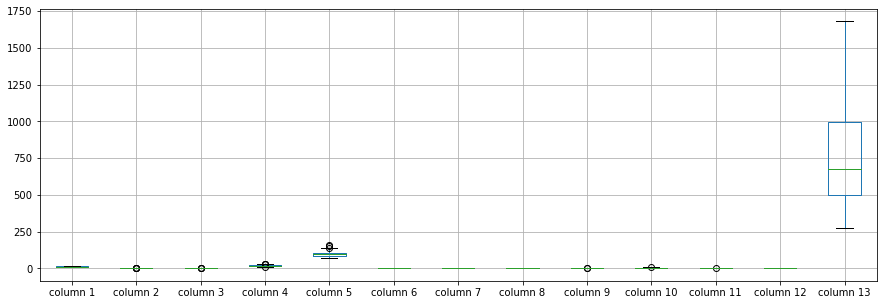

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.983041
column 2       2.295671
column 3       2.366517
column 4      19.494944
column 5      99.884146
column 6       2.256196
column 7       2.023567
column 8       0.363780
column 9       1.534631
column 10      5.057791
column 11      0.970443
column 12      2.584014
column 13    750.211538
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.070954,0.205230,-0.318130,0.235845,0.261574,0.241993,-0.129701,0.146213,0.534977,-0.053456,0.062536,0.644097
column 2,0.070954,1.000000,0.100541,0.279549,-0.074333,-0.364952,-0.432103,0.264752,-0.267215,0.304741,-0.583356,-0.380078,-0.203133
column 3,0.205230,0.100541,1.000000,0.443367,0.260319,0.138103,0.165402,0.176651,0.047969,0.212782,-0.061422,0.040442,0.211405
column 4,-0.318130,0.279549,0.443367,1.000000,-0.084991,-0.292428,-0.352209,0.339749,-0.209542,-0.003309,-0.278160,-0.282042,-0.443417
column 5,0.235845,-0.074333,0.260319,-0.084991,1.000000,0.204439,0.197745,-0.272588,0.294758,0.186318,0.048821,0.070318,0.366554
column 6,0.261574,-0.364952,0.138103,-0.292428,0.204439,1.000000,0.872154,-0.427006,0.587718,-0.116977,0.484821,0.716107,0.465456
column 7,0.241993,-0.432103,0.165402,-0.352209,0.197745,0.872154,1.000000,-0.508773,0.679412,-0.144622,0.563341,0.784196,0.502647
column 8,-0.129701,0.264752,0.176651,0.339749,-0.272588,-0.427006,-0.508773,1.000000,-0.376775,0.111401,-0.250928,-0.479789,-0.302998
column 9,0.146213,-0.267215,0.047969,-0.209542,0.294758,0.587718,0.679412,-0.376775,1.000000,-0.101133,0.341596,0.549648,0.345057
column 10,0.534977,0.304741,0.212782,-0.003309,0.186318,-0.116977,-0.144622,0.111401,-0.101133,1.000000,-0.505354,-0.419127,0.346481


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+45,13+45+45,13+45+45,13+45+45+45+45,13+45+45+45+45+45,13+45+45+45+45+45+45,13+45+45+45+45+45,13+45+45+45+45,13+45+45+45,13+45+45,13+45,13], vae_layer = False, seed = 450)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 854.8136707652699
Epoch: 1 , loss: 847.3220714222301
Epoch: 2 , loss: 852.3489268909801
Epoch: 3 , loss: 843.5278375799006
Epoch: 4 , loss: 844.0656294389205
Epoch: 5 , loss: 853.791709206321
Epoch: 6 , loss: 858.5832242098721
Epoch: 7 , loss: 854.0145097212358
Epoch: 8 , loss: 852.7929465553977
Epoch: 9 , loss: 849.7328935102983
Epoch: 10 , loss: 850.6133866743608
Epoch: 11 , loss: 855.0482732599431
Epoch: 12 , loss: 850.9461836381392
Epoch: 13 , loss: 852.2924249822444
Epoch: 14 , loss: 854.1753761985085
Epoch: 15 , loss: 853.4472045898438
Epoch: 16 , loss: 858.7475142045455
Epoch: 17 , loss: 855.5233653675426
Epoch: 18 , loss: 858.5282259854404
Epoch: 19 , loss: 857.365927956321
Epoch: 20 , loss: 851.6544744318181
Epoch: 21 , loss: 849.5438509854404
Epoch: 22 , loss: 848.3997247869319
Epoch: 23 , loss: 852.3492542613636
Epoch: 24 , loss: 854.7367942116477
Epoch: 25 , loss: 847.0809326171875
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,-62.057148,-2.204892,0.0,-0.258224,-2.495532,0.0,-0.412846,-2.628877,0.0
3,0.0,0.0,0.0,0.0,-92.851143,-3.393262,0.0,-0.095759,-2.068265,0.0,-0.435368,-3.059650,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
174,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
175,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
176,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3039.9079176068553, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.2789398193722497

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.000000,2.800000,3.06,0.280000,2.290000,5.64,1.040000,3.920000,1065.0
1,13.20,1.78,2.14,11.2,100.000000,2.650000,2.76,0.260000,1.280000,4.38,1.050000,3.400000,1050.0
2,13.16,2.36,2.67,18.6,38.942852,0.595108,3.24,0.041776,0.314468,5.68,0.617154,0.541123,1185.0
3,14.37,1.95,2.50,16.8,20.148857,0.456738,3.49,0.144241,0.111735,7.80,0.424632,0.390350,1480.0
4,13.24,2.59,2.87,21.0,118.000000,2.800000,2.69,0.390000,1.820000,4.32,1.040000,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.000000,1.680000,0.61,0.520000,1.060000,7.70,0.640000,1.740000,740.0
174,13.40,3.91,2.48,23.0,102.000000,1.800000,0.75,0.430000,1.410000,7.30,0.700000,1.560000,750.0
175,13.27,4.28,2.26,20.0,120.000000,1.590000,0.69,0.430000,1.350000,10.20,0.590000,1.560000,835.0
176,13.17,2.59,2.37,20.0,120.000000,1.650000,0.68,0.530000,1.460000,9.30,0.600000,1.620000,840.0


In [20]:
imputations[-1].to_excel("Wine_AE_10(imp).xlsx", index=False, header=False)